### How do firearm innovaitons corporate with safety?

In [75]:
import pandas as pd
from keyword_analysis import Keyword_Analysis
from patent_descriptive import Patent_Descriptive

In [76]:
# import the dataset
sample_abstract = pd.read_csv('./data/raw/sample_abstract.csv')
# create an object
KA = Keyword_Analysis(data=sample_abstract, num_keywords = 7, 
                      catch_word=["safe", "secure", "security", "safety"])

In [77]:
# get keywords
keyword = KA.get_keywords()

100%|██████████| 50/50 [00:02<00:00, 18.99it/s]


In [78]:
fck = KA.get_word_count(catch_word = True, keyword = True)

100%|██████████| 50/50 [00:00<00:00, 142.29it/s]


Frequency table for 'keyword':
                    keyword  Frequency
0                       FIG         17
1   figref idrefDRAWINGSFIG          8
2                    target          4
3          idrefDRAWINGSFIG          4
4              shown in FIG          3
5                  magazine          3
6                    figref          3
7                    member          2
8      State of Connecticut          2
9                      FIGS          2
10                    layer          2
11     detailed description          2
12                   barrel          2
13                      gun          2
14                    cable          2
15                     bolt          2
16              embodiments          2
17                    pulse          2
18                      end          2
19           rolling target          1


/Users/liusimin/Desktop/Gun Safety/python_code/GunSafety_pkg/patent_descriptive.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data['applicationFilingDate'] = pd.to_datetime(self.data['applicationFilingDate'], errors = 'coerce', utc=True)


<Figure size 2000x1500 with 0 Axes>

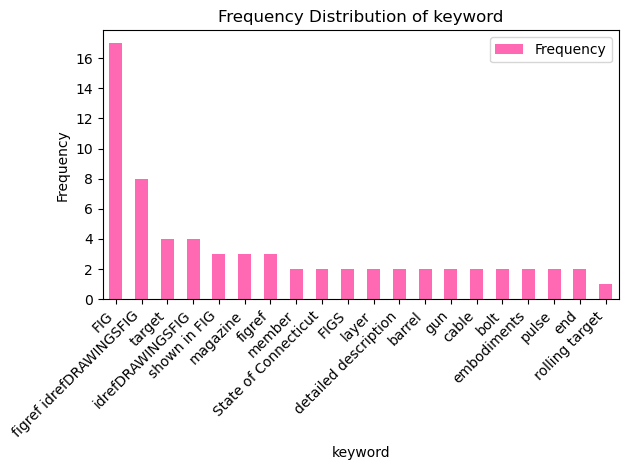

In [79]:
# import dataset
pd_data = pd.read_csv('./data/raw/patents.csv')
# merge the dataset
data = pd.merge(fck, pd_data, on='guid', how='left')
# create a Patent_Descriptive object 
pdt1 = Patent_Descriptive(data = data)
# reformat the dataset
pdt1.reformat()
# check frequency
kf = pdt1.frequency(data = pdt1.data, column = 'keyword', num = 20, figsize=(20,15))

In [80]:
inventor_state = pdt1.clean_by(pdt1.data, 'inventorState')
print("Original data:", pdt1.data.shape, "Cleaned data:", inventor_state.shape)

Original data: (50, 18) Cleaned data: (74, 18)


In [81]:
separated = pdt1.separate_category(data = inventor_state)
print("Original data:", inventor_state.shape, "Separated data:", separated.shape)

Original data: (74, 18) Separated data: (248, 23)


Year
1855     1
1888     1
1894     1
1912     1
1925     1
1927     1
1938     2
1962     1
1976     2
1977     1
1988     1
1989     2
1991     1
1993     4
1995     1
2001     1
2004     2
2005     1
2006     6
2008     3
2011     3
2012     6
2013     2
2014     8
2015     4
2016    10
2017     3
2018     5
2020    10
2021     1
2022     4
dtype: int64


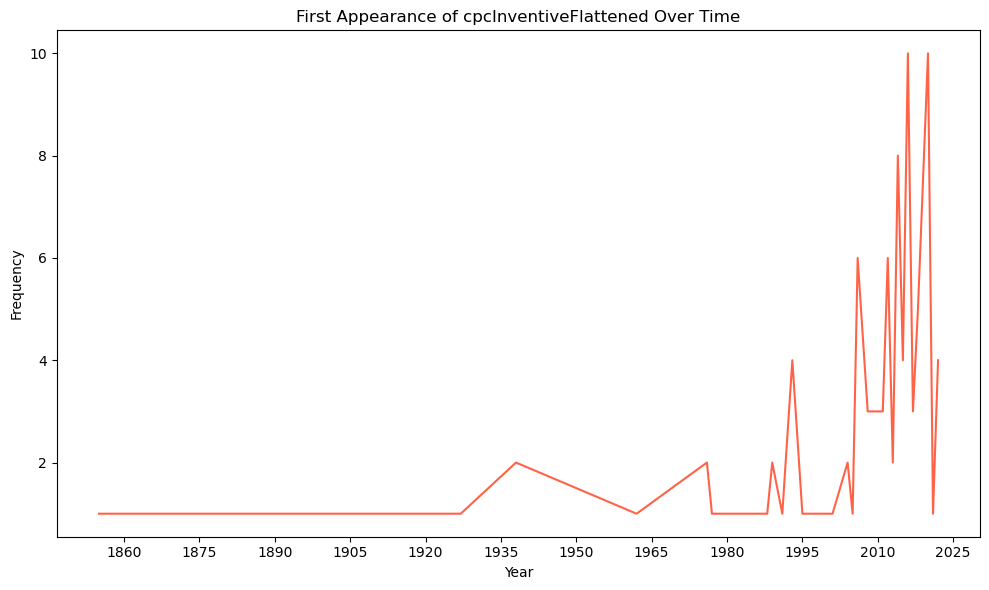

In [82]:
F41 = separated.loc[(separated['category'] == 'F') & (separated['subcategory1'] == '41')]
# print(type(F41['cpcInventiveFlattened'].iloc[0]))
fa = pdt1.first_appear(data = F41, target = 'cpcInventiveFlattened', graph = True, figsize = (10, 6), color = 'tomato')